In [6]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [52]:
# read file
data1= pd.read_csv('./adult.data')
data1.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','>50K, <=50K.']
data2= pd.read_csv('./adult.test', sep=",", header=None)
data2.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','>50K, <=50K.']
data1_x=data1.iloc[:,[0,2,4,10,11,12,14]]
data1_y=data2.iloc[:,[0,2,4,10,11,12,14]]
data1_x = data1_x.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data1_y = data1_y.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data1_x['label'] = np.where(data1_x['>50K, <=50K.'] == '>50K.', '>50K', data1_x['>50K, <=50K.'])
data1_x['>50K, <=50K.'] = np.where(data1_x['>50K, <=50K.'] == '>50K', 1, -1)
data1_x['>50K, <=50K.'] = np.where(data1_x['>50K, <=50K.'] == '>50K.', '>50K', data1_x['>50K, <=50K.'])
data1_x['>50K, <=50K.'] = np.where(data1_x['>50K, <=50K.'] == '>50K', 1, -1)
data1_y['>50K, <=50K.'] = np.where(data1_y['>50K, <=50K.'] == '>50K.', '>50K', data1_y['>50K, <=50K.'])
data1_y['>50K, <=50K.'] = np.where(data1_y['>50K, <=50K.'] == '>50K', 1, -1)

C:\Users\ighos\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
data1_x=data1.iloc[:,[0,2,4,10,11,12,14]]
data1_y=data2.iloc[:,[0,2,4,10,11,12,14]]
data1_x = data1_x.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data1_y = data1_y.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data1_x['label'] = np.where(data1_x['>50K, <=50K.'] == '>50K.', '>50K', data1_x['>50K, <=50K.'])
data1_x['label'] = np.where(data1_x['>50K, <=50K.'] == '>50K', 1, -1)
data1_x['>50K, <=50K.'] = np.where(data1_x['>50K, <=50K.'] == '>50K.', '>50K', data1_x['>50K, <=50K.'])
data1_x['>50K, <=50K.'] = np.where(data1_x['>50K, <=50K.'] == '>50K', 1, -1)
data1_y['>50K, <=50K.'] = np.where(data1_y['>50K, <=50K.'] == '>50K.', '>50K', data1_y['>50K, <=50K.'])
data1_y['>50K, <=50K.'] = np.where(data1_y['>50K, <=50K.'] == '>50K', 1, -1)

In [46]:
data1_x_normalized = MinMaxScaler().fit_transform(data1_x.values)
data1_y_normalized=MinMaxScaler().fit_transform(data1_y.values)
data_1_train= pd.DataFrame(data1_x_normalized)
data_2_test= pd.DataFrame(data1_y_normalized)
data_1_train.head()

,0,1,2,3,4,5,6,7
0,0.452055,0.048238,0.800000,0.0,0.0,0.122449,0.0,0.0
1,0.287671,0.138113,0.533333,0.0,0.0,0.397959,0.0,0.0
2,0.493151,0.151068,0.400000,0.0,0.0,0.397959,0.0,0.0
3,0.150685,0.221488,0.800000,0.0,0.0,0.397959,0.0,0.0
4,0.273973,0.184932,0.866667,0.0,0.0,0.397959,0.0,0.0


In [47]:
labels=data_1_train.iloc[:,6]
labels=labels.to_numpy()


In [38]:
# calculate accuracy
def cal_accuracy(predictions, yi):
    correct = 0
    for pred, actual in zip(predictions, yi):
        if pred == actual:
            correct += 1
    return correct / len(yi)


In [26]:
# update and gradient
def gradient(a, b, nda, lambda_val, data, yi):
    res = yi * (np.dot(a, data.T) + b)
    if res >= 1:
        temp = (nda * lambda_val) * a
        a -= temp
    else:
        temp = lambda_val * a
        temp -= yi * data
        a -= nda * temp
        b -= nda * (-yi)
    return a, b


In [27]:
# do batch gradient
def batch_gradient(batch_size, new_train, new_yi, a, b, nda, lambda_val):
    batch_a = np.zeros(6)
    batch_b = 0
    rand_ind = np.random.choice(range(len(new_train)), batch)
    for batch_ind in rand_ind:
        # gradient update parameter a and b
        xi = new_train[batch_ind]
        yi = new_yi[batch_ind]
        new_a, new_b = gradient(a, b, nda, lambda_val, xi, yi)
        batch_a += new_a
        batch_b += new_b

    a = (1 / batch) * batch_a
    b = (1 / batch) * batch_b
    return a,b

In [44]:
# predict class
def sign(test_set, a, b):
    result = np.dot(test_set, a.T) + b
    result[result <= 0] = -1
    result[result > 0] = 1
    return result


# train test split
def split(data, size):
    rows = data.shape[0]
    index = np.arange(0, rows)
    np.random.shuffle(index)
    new_index = index[:size]
    rest_index = index[size:]
    return new_index, rest_index


In [41]:
# calculate magnitude
def cal_mag(a):
    ssq = np.sum(a ** 2)
    return ssq


# parameters
epochs = 50
held_out = 50
season_steps = 300
acc_steps = 30
m = 1
n = 10
batch = 10
lambda_vals = [1e-3, 1e-2, 1e-1, 5e-1, 1]
num_val = 0.1


In [30]:
# SVM training
acc_30_steps = []
magnitude = []
def svm(lambda_val, train, labels):
    a = np.random.rand(6)
    b = np.random.rand(1)[0]
    count = 0
    stable_acc = 0
    for i in range(epochs):
        # held out 50 evaluation examples
        eval_index, train_index = split(data1_x_normalized, held_out)
        new_train = data1_x_normalized[train_index]
        new_yi = labels[train_index]
        new_test = data1_x_normalized[eval_index]
        new_label = labels[eval_index]

        for j in range(season_steps):
            # update nda for each season
            nda = batch*m / ((i+1)*j + batch*n)
            a, b = batch_gradient(batch, new_train, new_yi, a, b, nda, lambda_val)
            predictions = sign(new_test, a, b)
            season_acc = cal_accuracy(predictions, new_label)
            if stable_acc != season_acc:
                stable_acc = season_acc
                count = 0
            else:
                count += 1

            # calculate accuracy every 30 steps
            if (j % acc_steps == 0) & (j > 0):
                acc_30_steps.append(season_acc)
                magnitude.append(cal_mag(a))

        predictions = sign(new_test, a, b)
        epoch_acc = cal_accuracy(predictions, new_label)
        acc_30_steps.append(epoch_acc)
        magnitude.append(cal_mag(a))
        print("Epochs accuracy is ", epoch_acc)
    return a, b

In [48]:


# train validation split
val_index, season_index = split(data1_x_normalized, int(num_val * len(data1_x_normalized)))
search_train = data1_x_normalized[season_index]
search_yi = labels[season_index]
validation = data1_x_normalized[val_index]
val_label = labels[val_index]

# train svm
plot_acc = {}
plot_mag = {}
best_l = 0
best_acc = 0
best_a = 0
best_b = 0
for l in lambda_vals:
    acc_30_steps = []
    magnitude = []
    a, b = svm(l, search_train, search_yi)
    predictions = sign(validation, a, b)
    cur_acc = cal_accuracy(predictions, val_label)
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_l = l
        best_a = a
        best_b = b
    print("for lambda = ", l, " the accuracy on validation set is ", cur_acc)
    plot_acc["reg="+str(l)] = acc_30_steps
    plot_mag["reg="+str(l)] = magnitude
plot_mag['x'] = range(len(acc_30_steps))
plot_acc['x'] = range(len(magnitude))

ValueError: shapes (6,) and (8,) not aligned: 6 (dim 0) != 8 (dim 0)

ValueError: Unrecognized character e in format string

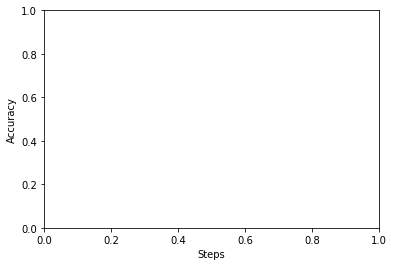

In [53]:
# multiple line plot
df = pd.DataFrame(plot_acc)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel("Steps")
plt.ylabel("Accuracy")
for l in lambda_vals:
    plt.plot('x', "reg="+str(l), data=df)
plt.legend()
plt.savefig('accuracy.png')

df = pd.DataFrame(plot_mag)
plt.xlabel("Steps")
plt.ylabel("Magnitude")
for l in lambda_vals:
    plt.plot('x', "reg="+str(l), data=df)
plt.legend(loc='upper right')
plt.savefig('magnitude.png')

print("best lambda: ", best_l)
predictions = sign(data1_y_normalized, best_a, best_b)

# write to submission file
file = open("submission.txt", "w")
for pred in predictions:
    if pred == -1:
        file.write("<=50K\n")
    else:
        file.write(">50K\n")
file.close()